In [66]:
## Rossmann Store Sales Data Preprocessing

# Imports and setup
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from pandas.errors import DtypeWarning
from pathlib import Path

warnings.simplefilter(action='ignore', category=DtypeWarning)
root = Path.cwd().parent


In [67]:
# Load datasets
train_df = pd.read_csv(root/'data'/'train.csv')
store_df = pd.read_csv(root/'data'/'store.csv')

# Quick peek: train.csv
train_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,1/15/2013,10350,1457,1,1,0,0
1,2,2,1/15/2013,7865,1413,1,0,0,0
2,3,2,1/15/2013,7249,865,1,0,0,0
3,4,2,1/15/2013,1829,846,1,1,0,0
4,5,2,1/15/2013,5202,602,1,1,0,0


In [68]:
# Quick peek: store.csv
store_df.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,a,a,4950,11,2011,0,NaN,NaN,NaN
1,2,c,c,9353,5,2014,1,NaN,NaN,NaN
2,3,a,a,18956,12,2014,1,NaN,NaN,NaN
3,4,a,a,23031,4,2015,0,NaN,NaN,NaN
4,5,a,a,1715,2,2006,0,NaN,NaN,NaN


In [69]:
df = train_df.merge(store_df, how='left', on='Store')

# Quick peek
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      120 non-null    int64  
 1   DayOfWeek                  120 non-null    int64  
 2   Date                       120 non-null    object 
 3   Sales                      120 non-null    int64  
 4   Customers                  120 non-null    int64  
 5   Open                       120 non-null    int64  
 6   Promo                      120 non-null    int64  
 7   StateHoliday               120 non-null    int64  
 8   SchoolHoliday              120 non-null    int64  
 9   StoreType                  120 non-null    object 
 10  Assortment                 120 non-null    object 
 11  CompetitionDistance        120 non-null    int64  
 12  CompetitionOpenSinceMonth  120 non-null    int64  
 13  CompetitionOpenSinceYear   120 non-null    int64  

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,1/15/2013,10350,1457,1,1,0,0,a,a,4950,11,2011,0,NaN,NaN,NaN
1,2,2,1/15/2013,7865,1413,1,0,0,0,c,c,9353,5,2014,1,NaN,NaN,NaN
2,3,2,1/15/2013,7249,865,1,0,0,0,a,a,18956,12,2014,1,NaN,NaN,NaN
3,4,2,1/15/2013,1829,846,1,1,0,0,a,a,23031,4,2015,0,NaN,NaN,NaN
4,5,2,1/15/2013,5202,602,1,1,0,0,a,a,1715,2,2006,0,NaN,NaN,NaN


In [70]:
# Check missing values
print(df.isnull().sum())


Store                         0
DayOfWeek                     0
Date                          0
Sales                         0
Customers                     0
Open                          0
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
StoreType                     0
Assortment                    0
CompetitionDistance           0
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek              96
Promo2SinceYear              96
PromoInterval                96
dtype: int64


📈 **Let us visualize the evolution of sales:**

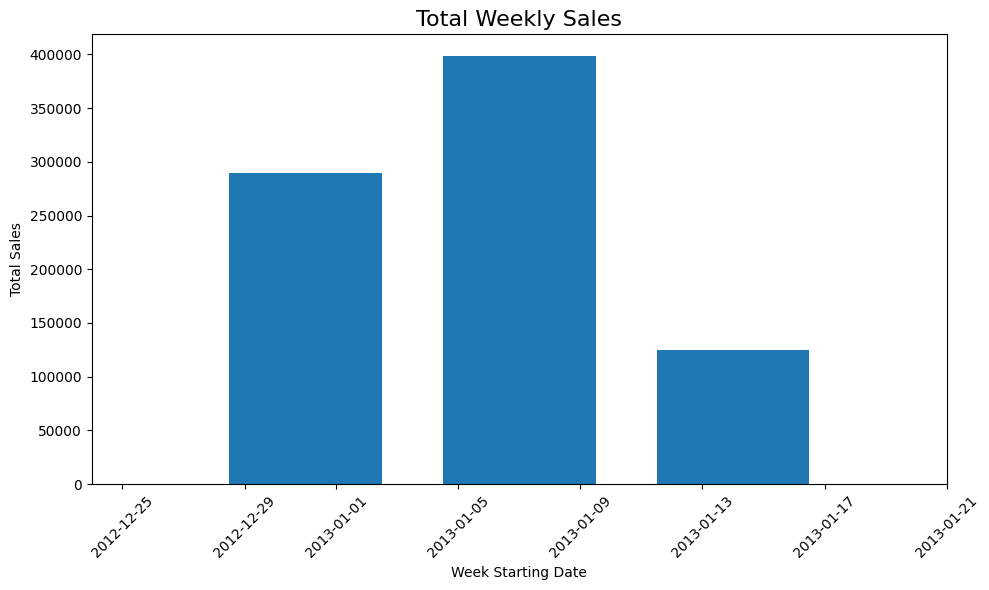

In [71]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by week and sum sales
weekly_sales = df.groupby(df['Date'].dt.to_period('W'))['Sales'].sum()

# Convert index from Period to Timestamp (start of week)
weekly_sales.index = weekly_sales.index.to_timestamp()

# Plot using matplotlib's bar
plt.figure(figsize=(10, 6))
plt.bar(weekly_sales.index, weekly_sales.values, width=5)  # width in days

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Y-axis starts at zero
plt.ylim(bottom=0)
plt.xlim(
    weekly_sales.index.min() - pd.Timedelta(weeks=1),
    weekly_sales.index.max() + pd.Timedelta(weeks=1)
)

plt.title('Total Weekly Sales', fontsize=16)
plt.xlabel('Week Starting Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [72]:
# Check if CompetitionOpenSinceMonth and Year are always missing together

month_missing = df['CompetitionOpenSinceMonth'].isnull()
year_missing = df['CompetitionOpenSinceYear'].isnull()

# Compare both masks
inconsistencies = df[month_missing != year_missing]

print(f"Number of inconsistent rows: {len(inconsistencies)}")
if len(inconsistencies) > 0:
    display(inconsistencies.head())
else:
    print("✅ Month and Year are always missing together.")


Number of inconsistent rows: 0
✅ Month and Year are always missing together.


In [73]:
# Check if missingness of Promo2SinceWeek, Promo2SinceYear, and PromoInterval perfectly matches Promo2 == 0

all_missing = (
    df['Promo2SinceWeek'].isnull() & 
    df['Promo2SinceYear'].isnull() & 
    df['PromoInterval'].isnull()
)

mismatch = df[all_missing != (df['Promo2'] == 0)]

print(f"Number of rows where missingness doesn't match Promo2 == 0: {len(mismatch)}")
if len(mismatch) > 0:
    display(mismatch.head())
else:
    print("✅ Missing Promo2SinceWeek, Promo2SinceYear, and PromoInterval perfectly match Promo2 == 0.")
 

Number of rows where missingness doesn't match Promo2 == 0: 24


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,2,2013-01-15,7865,1413,1,0,0,0,c,c,9353,5,2014,1,NaN,NaN,NaN
2,3,2,2013-01-15,7249,865,1,0,0,0,a,a,18956,12,2014,1,NaN,NaN,NaN
11,2,1,2013-01-14,6614,1015,1,1,0,0,c,c,9353,5,2014,1,NaN,NaN,NaN
12,3,1,2013-01-14,4112,1174,1,1,0,0,a,a,18956,12,2014,1,NaN,NaN,NaN
21,2,6,2013-01-12,11837,559,1,1,0,0,c,c,9353,5,2014,1,NaN,NaN,NaN


In [74]:
# Handle missing values in Rossmann dataset

# Create a flag for missing values and fill missing CompetitionDistance with median
df['CompetitionDistanceMissing'] = df['CompetitionDistance'].isnull().astype(int)
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())

# Flag missing competition open dates and fill missing values with the current row's date (assume competition just opened)
df['CompetitionOpenMissing'] = df['CompetitionOpenSinceYear'].isnull().astype(int)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['Date'].dt.month)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['Date'].dt.year)

# Cast to int (original columns are float due to NaNs)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(int)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(int)

# Fill missing promo-related values for stores not participating in Promo2
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0).astype(int)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0).astype(int)
df['PromoInterval'] = df['PromoInterval'].fillna('None')

# Confirm all missing values are handled
missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("Remaining missing values: 0")
else:
    print("Remaining missing values:\n")
    print(missing)


Remaining missing values: 0


🔧 FEATURE ENGINEERING:



In [75]:
## Extract date features

# Break down into year, month, and day of the week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek


In [76]:
## Compute months since competition opened

# Create datetime for competition opening
df['CompetitionOpenSince'] = pd.to_datetime(
    {
        'year': df['CompetitionOpenSinceYear'],
        'month': df['CompetitionOpenSinceMonth'],
        'day': 1
    }
)

# Calculate difference in months between 'Date' and 'CompetitionOpenSince'
df['MonthsSinceCompOpened'] = (
    (df['Date'].dt.year - df['CompetitionOpenSince'].dt.year) * 12 +
    (df['Date'].dt.month - df['CompetitionOpenSince'].dt.month)
).clip(lower=0).fillna(0).astype(int)


In [77]:
##  Define IsPromoIntervalActive (1 if promo active during this month, else 0)

# Mapping month names to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Function to determine if the promo is active in the current month
def promo_active(row):
    if pd.isna(row['PromoInterval']) or row['PromoInterval'] in ['None', '']:
        return 0
    promo_months = [month_map[month] for month in row['PromoInterval'].split(',')]
    return int(row['Date'].month in promo_months)

# Apply function row-wise
df['IsPromoIntervalActive'] = df.apply(promo_active, axis=1)


In [78]:
## Additional date features

# Week of the year (1–52)
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)

# Days since start of dataset (continuous time progression)
df['DaysSinceStart'] = (df['Date'] - df['Date'].min()).dt.days


In [79]:
## Label Encoding for Categorical Features

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['StateHoliday', 'StoreType', 'Assortment']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Cast all values to string
    label_encoders[col] = le

print("✅ Label encoding applied (with type-safe conversion) to:", categorical_cols)


✅ Label encoding applied (with type-safe conversion) to: ['StateHoliday', 'StoreType', 'Assortment']


In [80]:
# Drop columns not needed for modeling
df = df.drop(columns=[
    'Customers',
    'Date',
    'CompetitionOpenSince',
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'PromoInterval'
    ]
)


In [81]:
# Preview the updated DataFrame
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Store                       120 non-null    int64
 1   DayOfWeek                   120 non-null    int32
 2   Sales                       120 non-null    int64
 3   Open                        120 non-null    int64
 4   Promo                       120 non-null    int64
 5   StateHoliday                120 non-null    int64
 6   SchoolHoliday               120 non-null    int64
 7   StoreType                   120 non-null    int64
 8   Assortment                  120 non-null    int64
 9   CompetitionDistance         120 non-null    int64
 10  Promo2                      120 non-null    int64
 11  Promo2SinceWeek             120 non-null    int64
 12  Promo2SinceYear             120 non-null    int64
 13  CompetitionDistanceMissing  120 non-null    int64
 14  Competitio

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceWeek,Promo2SinceYear,CompetitionDistanceMissing,CompetitionOpenMissing,Year,Month,MonthsSinceCompOpened,IsPromoIntervalActive,WeekOfYear,DaysSinceStart
0,1,1,10350,1,1,0,0,0,0,4950,...,0,0,0,0,2013,1,14,0,3,13
1,2,1,7865,1,0,0,0,1,1,9353,...,0,0,0,0,2013,1,0,0,3,13
2,3,1,7249,1,0,0,0,0,0,18956,...,0,0,0,0,2013,1,0,0,3,13
3,4,1,1829,1,1,0,0,0,0,23031,...,0,0,0,0,2013,1,0,0,3,13
4,5,1,5202,1,1,0,0,0,0,1715,...,0,0,0,0,2013,1,83,0,3,13


In [82]:
# Save final DataFrame to CSV
df.to_csv(root/'data'/'processed_data.csv', index=False)
